#

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
SPINE_COLOR = 'gray'

In [2]:
x = np.linspace(0.04, 0.51, 1000)

In [3]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

Text(0, 0.5, '$\\alpha_m$')

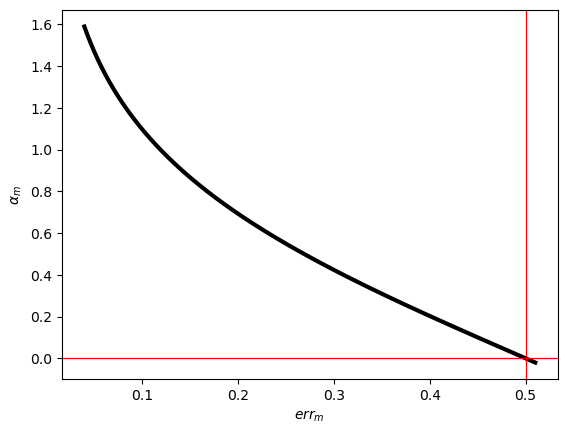

In [4]:
plt.plot(x, 0.5*np.log((1-x)/x), color='k', linewidth=3)
plt.axvline(0.5, color='r', linewidth=0.9)
plt.axhline(0.0, color='r', linewidth=0.9)
plt.xlabel(r"$err_m$")
plt.ylabel(r"$\alpha_m$")

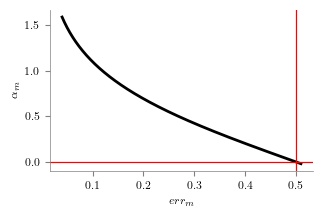

In [5]:
latexify()
plt.rcParams.update({'font.size': 40})
plt.plot(x, 0.5*np.log((1-x)/x), color='k', linewidth=2)
plt.axvline(0.5, color='r', linewidth=0.9)
plt.axhline(0.0, color='r', linewidth=0.9)
plt.xlabel(r"$err_m$")
plt.ylabel(r"$\alpha_m$")
format_axes(plt.gca())
plt.savefig("../supervised/assets/ensemble/figures/alpha-boosting.pdf", bbox_inches="tight", transparent=True)

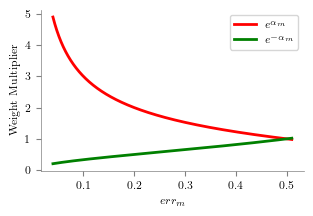

In [6]:
latexify()
plt.rcParams.update({'font.size': 40})
plt.plot(x, np.exp(0.5*np.log((1-x)/x)), color='r', linewidth=2, label=r'$e^{\alpha_m}$ ')
plt.plot(x, np.exp(-0.5*np.log((1-x)/x)), color='g', linewidth=2, label=r'$e^{-\alpha_m}$')

plt.xlabel(r"$err_m$")
plt.ylabel("Weight Multiplier")
format_axes(plt.gca())
plt.legend()
plt.savefig("../supervised/assets/ensemble/figures/alpha-boosting-weight.pdf", bbox_inches="tight", transparent=True)